In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

### Reproduce pk_42 cosmology

In [2]:
z = 0
cosmo_params = ['omega_b', 'omega_cdm', 'h', 'ln10^{10}A_s', 'n_s']

In [3]:
cosmo_bank_dat = np.loadtxt('pk_for_henry/cosmo.dat')

In [4]:
index = 42
cosmo_fid = cosmo_bank_dat[index]
cosmo_data = np.loadtxt('pk_for_Henry/pk_' + str(index) + '.dat')
cosmo = {k: v for (k,v) in zip(cosmo_params, cosmo_fid)}

In [56]:
M = Class()
M.set(cosmo)
M.set({'output': 'mPk','P_k_max_h/Mpc': 100, 'z_max_pk': z})
M.compute()
kk = np.logspace(-5, 2, 500)
pk_h = np.array([M.pk_lin(k*M.h(), z)*M.h()**3 for k in kk])

In [57]:
kk_data, pk_data = cosmo_data.transpose()

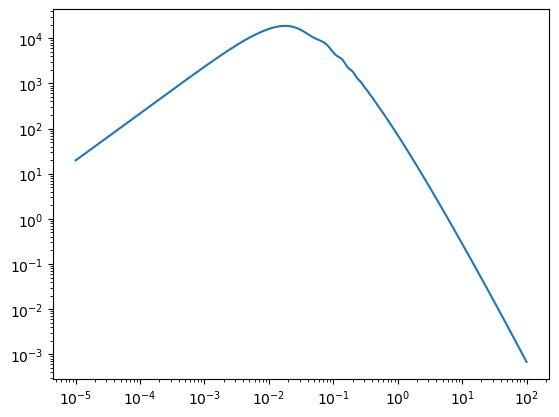

In [58]:
plt.loglog(kk, pk_h)
# plt.loglog(kk_data, pk_data)

In [67]:
# np.array([[k, p] for (k,p) in zip(kk, pk_h)]).tofile('pk_42_kmax100.dat')

### Reproduce fiducial pk_fid

In [43]:
index = 0
z = 0.57
omega_b = 0.02237
omega_c = 0.1203
mnu = 0.06
h = 0.673
omega_m = omega_b + omega_c + mnu/93.14
Omega_m = omega_m/h**2



cosmo_fid = cosmo_bank_dat[index]
cosmo_data = np.loadtxt('pk_fid.dat')#np.loadtxt('pk_for_Henry/pk_' + str(index) + '.dat')
cosmo = {'omega_b': omega_b, 'omega_cdm': omega_c, 'h': h, 'ln10^{10}A_s': 3.044, 'n_s': 0.965, 'N_ncdm': 1., 'N_ur': 2.0328, 'm_ncdm': mnu, 'T_ncdm': 0.71611
              }
M = Class()
M.set(cosmo)
M.set({'output': 'mPk','P_k_max_h/Mpc': 1, 'z_max_pk': z})
M.compute()
kk = np.logspace(-5, 0, 200)
pk_h = np.array([M.pk_lin(k*M.h(), z)*M.h()**3 for k in kk])
kk_data, pk_data = cosmo_data.transpose()

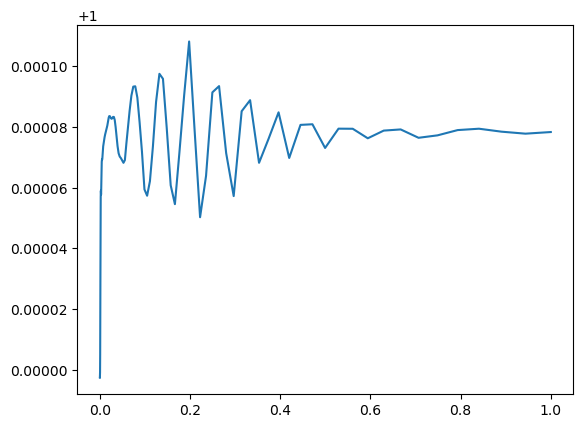

In [44]:
plt.plot(kk, pk_h/pk_data)
# plt.ylim([0.99,1.01])

In [37]:
np.array([[k, p] for (k,p) in zip(kk, pk_h)]).tofile('pk_fid_kmax100.dat')